In [ ]:
import torch
import numpy as np

# Тензоры

Тензоры — это структура данных, очень похожая на массивы и матрицы. В PyTorch мы используем тензоры для кодирования входных и выходных данных модели, а также параметров модели

Тензоры очень похожи на ndarrays в NumPy, за исключением того, что тензоры могут работать на графических процессорах (видеокартах) или других аппаратных ускорителях. Тензоры также оптимизированы для автоматического дифференцирования (подробнее об этом мы поговорим позже в разделе **Autograd**)

## Инициализация тензора

Тензоры можно инициализировать различными способами. Рассмотрим несколько примеров:

### Напрямую из данных

In [ ]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

In [ ]:
x_data

tensor([[1, 2],
        [3, 4]])

### Из NumPy array

In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [ ]:
x_np

tensor([[1, 2],
        [3, 4]])

### Из другого тензора

Новый тензор сохраняет свойства (форму, тип данных) тензора аргумента, если они не переопределены явно:

In [ ]:
x_data

tensor([[1, 2],
        [3, 4]])

In [ ]:
x_ones = torch.ones_like(x_data)  # сохраняет свойства x_data
print(f"Ones Tensor: \n {x_ones} \n")


# дз
x_ones2 = torch.ones_like(x_data, dtype=torch.float)  # переписывает тип данных x_data
print(f"Ones Float Tensor (): \n {x_ones2} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # переписывает тип данных x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Ones Float Tensor (): 
 tensor([[1., 1.],
        [1., 1.]]) 

Random Tensor: 
 tensor([[7.0323e-01, 7.0239e-01],
        [4.8618e-01, 6.2287e-05]]) 



### Рандомными или константными значениями


**shape** представляет собой кортеж (tuple) тензорных измерений. В функциях ниже он определяет размерность выходного тензора.

In [ ]:
shape = (2,3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.4305, 0.5304, 0.8917],
        [0.2847, 0.8801, 0.8625]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


**Задание (1 балл):**
Создайте тензор, состоящий из нулей с 4 столбцами и 2 строками



In [ ]:
torch.zeros(2, 4)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.]])

**Задание (1 балл):**
Создайте тензор, состоящий из случайных значений с плавающей точкой с 2 столбцами и 5 строками

In [ ]:
torch.rand(5, 2, dtype=torch.float)

tensor([[0.4484, 0.6361],
        [0.4245, 0.7703],
        [0.5871, 0.1133],
        [0.0568, 0.5891],
        [0.8748, 0.5609]])

In [ ]:
#создание единичной матрицы
torch.eye(4)

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

## Атрибуты тензора


Атрибуты тензора описывают их форму, тип данных и устройство, на котором они хранятся

In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## Операции над тензорами

[Здесь](https://pytorch.org/docs/stable/torch.html) подробно описаны более 100 тензорных операций, включая арифметические, операции линейной алгебры, манипуляции с матрицами (транспонирование, индексирование, слайсинг), выборку и многое другое.

Каждую из этих операций можно выполнить на графическом процессоре (gpu, гпу), и почти всегда это работает на порядок быстрее, чем те же вычисления на центральном процессоре (cpu, цпу).

**Берем gpu в Colab**<br>
Среда выполнения -> Сменить среду выполнения -> GPU.


По умолчанию тензоры создаются на cpu. Нам нужно явно переместить тензоры на gpu с помощью метода **.to** (после проверки доступности gpu). Имейте в виду, что копирование больших тензоров на разные устройства может потребовать больших затрат времени и памяти


In [ ]:
# Перемещаем тензор на gpu, если gpu имеется
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

In [ ]:
tensor

tensor([[0.8794, 0.0870, 0.3901, 0.9626],
        [0.0142, 0.7454, 0.2375, 0.4577],
        [0.9222, 0.0959, 0.6661, 0.0135]])

In [ ]:
tensor + tensor

tensor([[1.7587, 0.1739, 0.7802, 1.9252],
        [0.0284, 1.4907, 0.4750, 0.9153],
        [1.8445, 0.1917, 1.3323, 0.0269]])

In [ ]:
# и переведем обратно на cpu
tensor = tensor.to("cpu")

**Задание (1 - 3 балла):** выберите 1-3 (по 1 баллу за каждую операцию) новых для вас операций над тензорами [отсюда](https://pytorch.org/docs/stable/torch.html), опишите их и примените к каким-нибудь новым тензорам

+1 балл, если все операции выполняете на gpu

In [ ]:
# абсолютное значение
tensor.abs()

tensor([[0.8794, 0.0870, 0.3901, 0.9626],
        [0.0142, 0.7454, 0.2375, 0.4577],
        [0.9222, 0.0959, 0.6661, 0.0135]])

In [ ]:
# логарифм
tensor.log()

tensor([[-0.1286, -2.4424, -0.9413, -0.0381],
        [-4.2538, -0.2939, -1.4377, -0.7816],
        [-0.0810, -2.3447, -0.4062, -4.3080]])

In [ ]:
# округление
torch.round(tensor)

tensor([[1., 0., 0., 1.],
        [0., 1., 0., 0.],
        [1., 0., 1., 0.]])

## Еще больше операций над тензорами

### Индексация, слайсинг

In [ ]:
tensor = torch.ones(4, 4)
print(tensor)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


### Присоединение тензоров

In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


### Арифметические операции

In [ ]:
tensor

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [ ]:
# Умножаем матрицы: y1, y2, y3 будут одинаковыми
# ``tensor.T`` возвращает транспонированную матрицу

y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)
y1, y2, y3

(tensor([[3., 3., 3., 3.],
         [3., 3., 3., 3.],
         [3., 3., 3., 3.],
         [3., 3., 3., 3.]]),
 tensor([[3., 3., 3., 3.],
         [3., 3., 3., 3.],
         [3., 3., 3., 3.],
         [3., 3., 3., 3.]]),
 tensor([[3., 3., 3., 3.],
         [3., 3., 3., 3.],
         [3., 3., 3., 3.],
         [3., 3., 3., 3.]]))

In [ ]:
# Поэлементное умножение. z1, z2, z3 будут одинаковыми
z1 = tensor * tensor
z2 = tensor.mul(tensor)
z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)
z1, z2, z3

(tensor([[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]]),
 tensor([[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]]),
 tensor([[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]]))

### Тензоры с одним значением


In [ ]:
# Если наш тензор состоит из одного значения, то можем конвертнуть его в значение в Python через .item()
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


### In-place операции



In [ ]:
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


## Из тензора в NumPy array

In [ ]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


Будьте аккуратны! Они ссылаются на один адрес в памяти, поэтому, изменяя тензор, будет изменяться и NumPy array

In [ ]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


И наборот:

In [ ]:
n += 1
print(f"t: {t}")
print(f"n: {n}")

t: tensor([3., 3., 3., 3., 3.])
n: [3. 3. 3. 3. 3.]


**Задание (2 балла)** <br>
Подумайте, как мы можем избежать такого поведения

Найдите решение (можете в том числе гуглить)

In [ ]:
# Метод clone()

t_1 = torch.zeros(4)
print(f"t: {t_1}")
n_1 = t_1.clone().numpy()
print(f"n: {n_1}")

t: tensor([0., 0., 0., 0.])
n: [0. 0. 0. 0.]


In [ ]:
t_1.add_(1)
print(f"t: {t_1}")
print(f"n: {n_1}")

t: tensor([1., 1., 1., 1.])
n: [0. 0. 0. 0.]


In [ ]:
#Альтернативные варианты

#Создание пустого тензора и копирование в него исходного
t_2 = torch.empty_like(t_1).copy_(t_1)

#Использование deepcopy
from copy import deepcopy

t_3 = deepcopy(t_1)

t_1, t_2, t_3

(tensor([1., 1., 1., 1.]), tensor([1., 1., 1., 1.]), tensor([1., 1., 1., 1.]))

# Автоматические дифференцирование с torch.autograd



При обучении нейронных сетей наиболее часто используемый алгоритм — обратное распространение ошибки (back propogation или просто backprop). В этом алгоритме параметры (веса модели) корректируются (изменяются) в соответствии с градиентом функции потерь по отношению к данному параметру.

Для вычисления этих градиентов в PyTorch есть встроенный механизм дифференциации под названием torch.autograd. Он поддерживает автоматическое вычисление градиента для любого вычислительного графа.

Рассмотрим простейшую однослойную нейронную сеть с входными данными **x**, параметрами **w** и **b** и некоторой функцией потерь. Его можно определить в PyTorch следующим образом:

In [ ]:
import torch

x = torch.ones(5)  # входной тензор
y = torch.zeros(3)  # ожидаемый тензор на выходе
w = torch.randn(5, 3, requires_grad=True)  # можем поставить requires_grad при создании тензора, а можем потом с помощью x.requires_grad_(True)
b = torch.randn(3, requires_grad=True)

z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

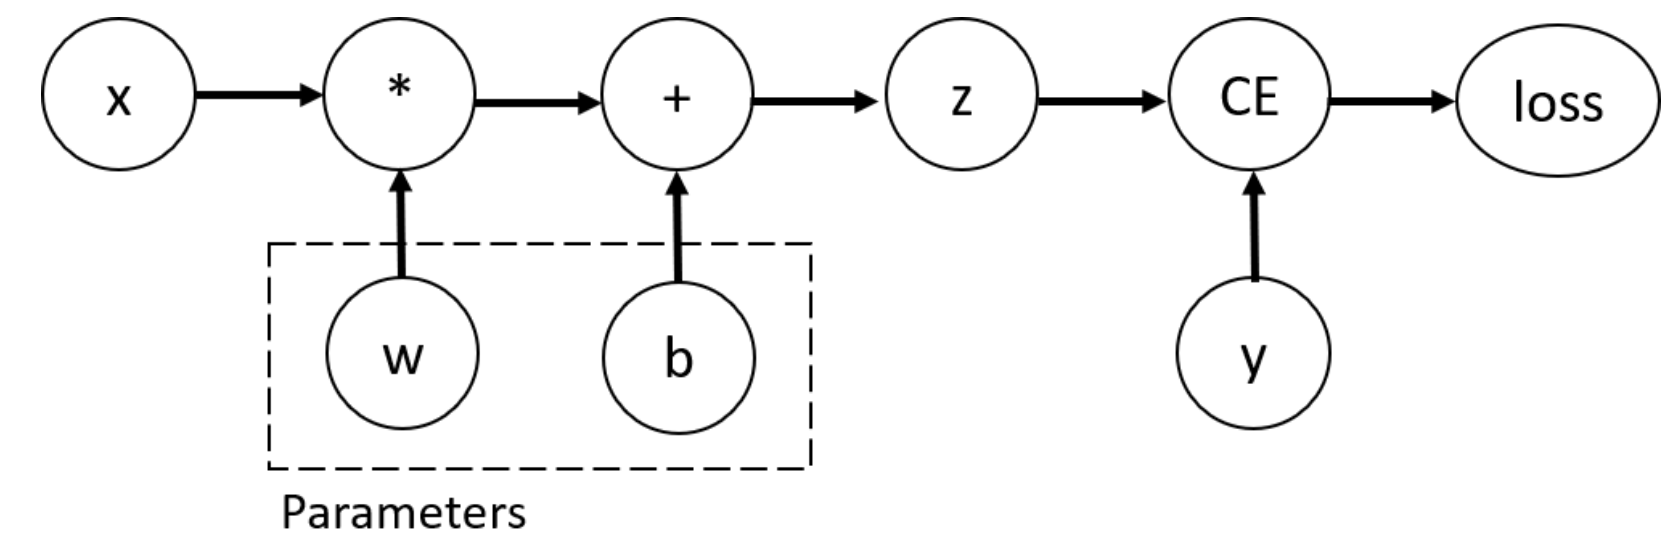

Функция, которую мы применяем к тензорам для построения вычислительного графа, на самом деле является объектом класса Function. Этот объект знает, как вычислить производную функции на этапе обратного распространения. Ссылка на функцию обратного распространения хранится в свойстве grad_fn тензора.

In [ ]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x7ac2308daf20>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7ac2308db220>


### Вычисление градиентов


Чтобы оптимизировать веса параметров в нейронной сети, нам необходимо вычислить производные нашей функции потерь по параметрам, а именно, нам нужно
$\frac{\partial loss}{\partial w}$ и
$\frac{\partial loss}{\partial b}$ при некоторых фиксированных значениях x и y. Чтобы вычислить эти производные, мы вызываем loss.backward(), а затем получаем значения из w.grad и b.grad:

In [ ]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.3280, 0.0616, 0.3264],
        [0.3280, 0.0616, 0.3264],
        [0.3280, 0.0616, 0.3264],
        [0.3280, 0.0616, 0.3264],
        [0.3280, 0.0616, 0.3264]])
tensor([0.3280, 0.0616, 0.3264])


### Отключение подсчета градиента

По умолчанию все тензоры с `require_grad=True` отслеживают историю своих вычислений и поддерживают вычисление градиента. Однако в некоторых случаях нам не нужно этого делать, например, когда мы обучили модель и просто хотим применить ее к некоторым входным данным. Мы можем отключить отслеживание вычислений, окружив наш вычислительный код блоком `torch.no_grad()`:

In [ ]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


ИЛИ используем `.detach()` метод:

In [ ]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


Есть несколько причин, по которым вам может потребоваться отключить отслеживание градиента:
- Заморозить некоторые параметры вашей сети и не обучать их
- Ускорить вычисления, когда вы выполняете только прямой проход, поскольку вычисления с тензорами, которые не отслеживают градиенты, будут более эффективными

**Задание (до 5 баллов)**<br>
Проделайте те же действия, но:
- Придумайте свою новую модель (+1 балла)
- Добавьте больше весов, чем у модели выше (+1 балл)
- Добавьте больше операций, чем у модели выше (+1 балл)
- Заморозьте часть весов (+1 балл)
- Изобразите вычислительный граф (можете использовать idroo/paint/лист бумаги/т.д.) (+1 балл)


In [ ]:
x = torch.ones(10)  # входной тензор
y = torch.zeros(5)  # ожидаемый тензор на выходе
w = torch.randn(5, requires_grad=True)  # можем поставить requires_grad при создании тензора, а можем потом с помощью x.requires_grad_(True)
b = torch.randn(5, requires_grad=True)
a = torch.randn(5, requires_grad=False)


if torch.cuda.is_available():
    x = x.to("cuda")
    y = y.to("cuda")
    w = w.to("cuda")
    b = b.to("cuda")
    a = a.to("cuda")

z = w.div(x @ x - 4 * a) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

z

tensor([-1.0040,  0.2098,  0.5951, -1.4862, -0.7947], grad_fn=<AddBackward0>)

In [ ]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x7ac1d74ef8e0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7ac1d74eeaa0>


In [ ]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([0.0058, 0.0067, 0.0121, 0.0018, 0.0072])
tensor([0.0536, 0.1105, 0.1289, 0.0369, 0.0622])


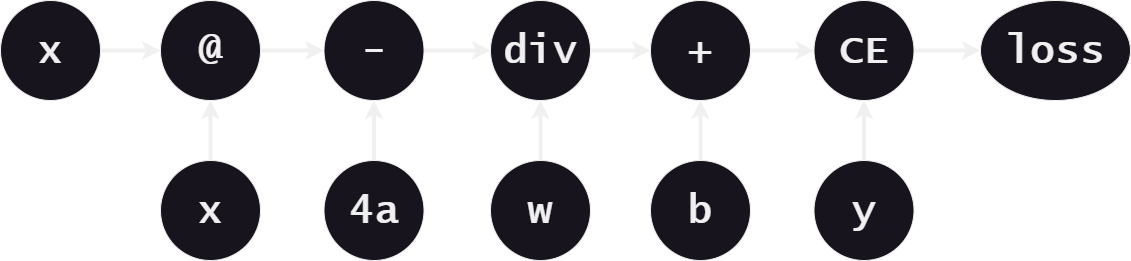